<a href="https://colab.research.google.com/github/arturcgs/BootcampDataScienceAplicada3/blob/main/Projeto%20Final/Notebooks/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bem vindo!

Este Notebook é dedicado ao **projeto final do BootCamp Data Science Aplicada 3**, da Alura. 

Neste projeto, será analisado o banco de dados clínicos de pacientes do Sírio Libanês, disponível no [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19). O objetivo deste banco de dados é gerar um modelo que preveja se um paciente de COVID-19 precisará ser internado na UTI. Para isso, diversos dados clínicos são disponibilizados, como sexo, idade, doenças pré-existentes, resultados de exames de sangue, entre outros.

Este Notebook irá realizar uma Análise Exploratória dos dados, avaliar diferentes modelos e parâmetros diferentes e avaliar e gerar um modelo final.

Para impotação de bibliotecas, definição de funções e limpeza de dados, seguir para [este Notebook](https://github.com/arturcgs/BootcampDataScienceAplicada3/blob/main/Projeto%20Final/Notebooks/Projeto_Final_Funcoes_e_Limpeza_de_Dados.ipynb)

# Importação do notebook com as funções e limpeza de dados

In [1]:
#Clonando o git para acessar o notebook desejado

!git clone 'https://github.com/arturcgs/BootcampDataScienceAplicada3/'

fatal: destination path 'BootcampDataScienceAplicada3' already exists and is not an empty directory.


In [2]:
#roda o notebook com as funções e os dados

%run '/content/BootcampDataScienceAplicada3/Projeto Final/Notebooks/Projeto_Final_Funcoes_e_Limpeza_de_Dados.ipynb' 

Foram excluídos 37 parâmetros
Foram excluídos 130 parâmetros


#Análise Exploratória

Para a Análise Exploratória, o objetivo é simples: entender melhor seus dados. A execução, porém, já é mais complexa. Aqui, eu analisei diferentes variáveis, observando seu comportamento em relação à nossa variável alvo, a internação na UTI. Para isso, plotei gráficos de barras observando três variáveis: Gênero, Idade acima ou abaixo de 65 anos e Percentil de Idade.

Inicialmente, eu planejava analisar diferentes resultados de exames, porém, seus dados estão normalizados, impossibilitando a análise exploratória.

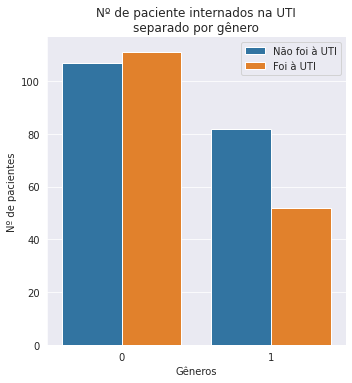

In [3]:
#Realização do gráfico de UTI por gênero

sns.set_style('darkgrid')

ax = sns.catplot(x = 'GENDER', data = dados_limpos_final, kind = 'count', hue='ICU', legend = False).set(title = 'Nº de paciente internados na UTI\nseparado por gênero')

#Labels Eixos
ax.set(xlabel='Gêneros', ylabel='Nº de pacientes')

#Arrumando legenda
plt.legend(title='', loc = 1, labels = ['Não foi à UTI', 'Foi à UTI'])

plt.show()

Primeiramente, comecei pelo gênero, como pode ser observado acima. Como os dados são anonimizados, não sabemos a qual gênero cada categoria significa. 

Ao analisar o gráfico, podemos ver que mais pacientes do gênero 0 foram à UTI do que não foram à UTI. Já para o gênero 1, a maioria dos pacientes não foi à UTI. Assim, podemos ver que **a proporção de pacientes que foi à UTI é maior no gênero 0**.

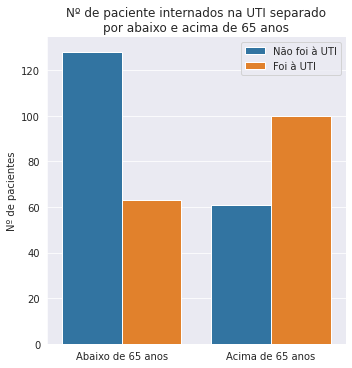

In [4]:
#Realização do gráfico de UTI por idade acima de 65 anos

ax = sns.catplot(x = 'AGE_ABOVE65', data = dados_limpos_final, kind = 'count', hue='ICU',
                 legend = False).set(title = 'Nº de paciente internados na UTI separado\npor abaixo e acima de 65 anos')

#Labels Eixos
ax.set(xlabel = '', ylabel='Nº de pacientes')

#Nome barras
ax.set(xticklabels=['Abaixo de 65 anos', 'Acima de 65 anos'])

#Arrumando legenda
plt.legend(title='', loc = 1, labels = ['Não foi à UTI', 'Foi à UTI'])

plt.show()

Agora, analisaremos a variável se o paciente tem mais ou menos de 65 anos. Podemos observar que, nos pacientes abaixo de 65 anos, a maioria não foi à UTI. Já nos pacientes acima de 65 anos, o contrário foi observado.

Também é possível observar como a diferença de pacientes que foram e não foram à UTI, em ambos os grupos, é muito maior na comparação deste gráfico, no que no gráfico por gênero. Isso pode mostrar que o fato do paciente ter mais ou menos que 65 anos é mais relevante do que seu gênero.

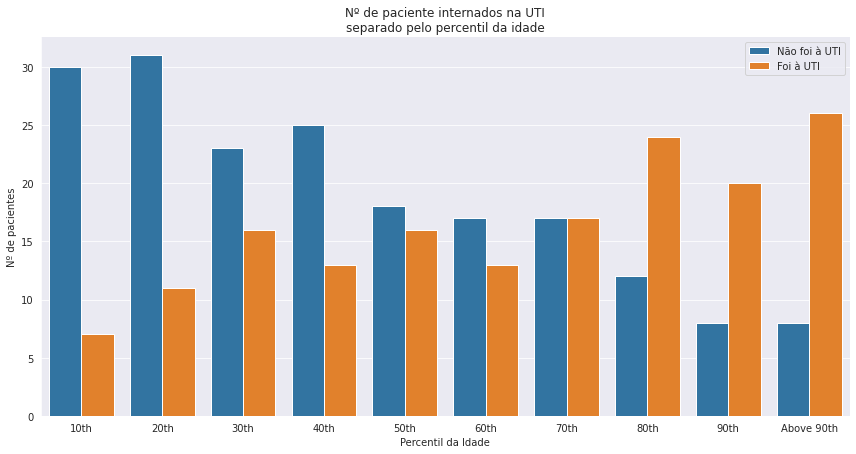

In [5]:
#Realização de gráfico de UTI por percentil de idade

order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

ax = sns.catplot(x = 'AGE_PERCENTIL', data = dados_limpos_final, kind = 'count', hue='ICU',
                 order = order, height = 6, aspect = 2, legend = False).set(title = 'Nº de paciente internados na UTI\nseparado pelo percentil da idade')

#Labels Eixos
ax.set(xlabel='Percentil da Idade', ylabel='Nº de pacientes')

#Nome barras
ax.set(xticklabels=['10º', '20º', '30º', '40º', '50º', '60º', '70º', '80º', '90º', 'Acimda do 90º'])

#Arrumando Legenda
plt.legend(title='', loc = 1, labels = ['Não foi à UTI', 'Foi à UTI'])

plt.show()

Agora, observamos o percentil de idade. Esta variável nos mostra, nos 10º, os 10% pacientes mais novos, no 20º, os 20% , e assim por diante.

Analisando o gráfico, é claro como o número de pacientes que vâo à UTI tendo a aumentar diretamente relacionado ao percentil da idade. Esse é um grande indicativo que, quanto maior a idade, maior o risco do paciente ir à UTI.

# Testando modelos e hiperparâmetros diferentes

Com a Análise Exploratório realizada, e entendendo melhor nosso banco de dados, podemos passar aos testes de diferentes modelos e hiperparâmetros. 

Primeiramente, o banco de dados é dividido entre um grup de treino e outro de teste. O grupo treino, então, passará por uma batelada de testes para decidirmos qual o melhor modelo para seguirmos nossos estudos.

Para este projeto, decidi testar 4 modelos diferentes:
1. Regressão Logística - Linear Model
2. Random Forest - Ensemble
3. C-Support Vector Classification (SVC) - Support Vector Machine (SVM)
4. Multi-layer Perceptron Classifier - Neural Network

Estes modelos foram escolhidos para testarmos diferentes estratégias e tipos de modelos. 

In [26]:
#Setando a seed

np.random.seed(346689)

In [27]:
#Separando grupos de saída e entrada

y = dados_limpos_final['ICU']
x = dados_limpos_final.drop(['ICU'], axis=1)

#Separando entre grupo treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [28]:
#Primeiro, vamos criar o model_params que eu vou usar no RandomizedSearchCV

model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter = 10000),
        'params': {
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'saga'],
            'C': [10, 1.0, 0.1]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': randint(10, 500),
            'max_depth': randint(3, 6),
            'min_samples_split': randint(32, 129),
            'min_samples_leaf': randint(32, 129),
            'bootstrap': [True, False],
            'criterion': ['gini', 'entropy']
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1,1, 10, 100],
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
        }
    },
}

In [29]:
resultado_best_params = best_params_randomized(x_train, y_train, model_params)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py",

Tempo de execução:  8.386


In [35]:
model_params_MLP = {
    'MLP Classifier': {
        'model': MLPClassifier(max_iter = 3000),
        'params': {
            'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'activation': ['tanh', 'relu', 'logistic'],
            'solver': ['sgd', 'adam', 'lbfgs'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive', 'invscaling'],
        }
    }
}

In [36]:
resultado_best_params_MLP = best_params_randomized(x, y, model_params_MLP, n_repeats = 5, n_iter = 3)

Tempo de execução:  15.775


In [37]:
#Juntando as duas tabelas de resultados

resultados = pd.concat([resultado_best_params, resultado_best_params_MLP], ignore_index = True, axis = 0)

resultados

,model,best_score,best_params
0,Logistic Regression,0.773986,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}"
1,Random Forest,0.782738,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
2,SVC,0.771607,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}"
3,MLP Classifier,0.746725,"{'solver': 'sgd', 'learning_rate': 'adaptive',..."


In [38]:
#Vendo os parâmetros utilizados no modelo de RandomForest com melhor resultado

print("O modelo de Random Forest com melhor resultado utilizou os seguinte parâmetros:\n")
resultados.iat[1,2]

O modelo de Random Forest com melhor resultado utilizou os seguinte parâmetros:



{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 40,
 'min_samples_split': 34,
 'n_estimators': 182}

In [39]:
#Primeiro, vamos criar o model_params q eu vou usar no RandomizedSearchCV

model_params_rf = {
    'Random Forest': {
        'model': RandomForestClassifier(max_depth = 5, criterion='gini'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 4],
            'min_samples_leaf': [30, 40, 50],
            'min_samples_split': [30, 40, 50],
            'bootstrap': [True, False]
        }
    }
}

In [40]:
resultado_rf = best_params_grid(x, y, model_params_rf, n_repeats = 10)

resultado_rf

Tempo de execução:  14.382


,model,best_score,best_params
0,Random Forest,0.791515,"{'bootstrap': True, 'max_depth': 3, 'min_sampl..."


In [41]:
resultado_rf['best_params'].values

array([{'bootstrap': True, 'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 100}],
      dtype=object)